<a href="https://colab.research.google.com/github/aryelmedeiros/digital_systems/blob/main/redes_neurais_embarcadas/Sistemas_Digitais_Trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import pandas as pd 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Lendo o arquvio que representa as entradas 

In [2]:
X1=pd.read_csv('X_In.csv')
X1.head()

,G,F,E,D,C,B,A
0,4.231242,0.780309,4.730696,2.156199,0.645430,3.787909,2.969870
1,0.636853,2.024109,2.090387,2.159703,3.502169,2.557124,3.135354
2,2.986594,0.456140,0.779718,3.521068,2.736177,3.317250,2.819513
3,0.038345,4.963844,3.928005,2.248092,3.118439,2.997237,4.477473
4,0.161174,0.377934,0.603821,0.664421,3.294831,4.219109,0.200306


### Lendo o arquvio que representa as saídas 

In [3]:
Y1=pd.read_csv('Y_Out.csv')
Y1.head()

,D8,D4,D2,D1
0,0,0,1,0
1,0,0,0,0
2,1,0,0,1
3,0,0,0,0
4,0,0,0,1


### Separando o Conjunto para Treinamento e Teste da rede 

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X1,Y1,
    test_size=0.2, 
    random_state=36
)

x_train.head()

,G,F,E,D,C,B,A
1744,0.634871,0.260274,0.120369,0.213064,3.333546,2.240588,2.408543
2847,2.958249,0.404613,0.064944,4.754254,4.757221,2.512015,4.034577
2867,4.996156,0.426495,0.056511,4.424242,3.204069,2.337421,4.998118
1396,3.033935,2.065023,0.213739,0.216075,3.921903,2.030379,0.030073
1111,3.132424,3.741727,0.728984,0.339927,4.283104,4.537961,0.304483


In [5]:
print(X1.shape[1], Y1.shape[1])

7 4


## Criando o Modelo da Rede 

In [23]:
input_shape = X1.shape[1]   
output_shape = Y1.shape[1]  

mlp = Sequential([
    Dense(7, activation='tanh', input_shape=(input_shape,)),
    Dense(15, activation='tanh'),
    Dense(4,activation='sigmoid')
])

mlp.compile(
    optimizer="adam", 
    loss= tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['binary_accuracy']
)

mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 15)                120       
                                                                 
 dense_8 (Dense)             (None, 4)                 64        
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


## Treinando o Modelo 

In [24]:
history = mlp.fit(
    x_train, y_train,
    batch_size=10,
    epochs=200
)

Epoch 1/200


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


240/240 [==============================] - 1s 2ms/step - loss: 0.5606 - binary_accuracy: 0.7175
Epoch 2/200
240/240 [==============================] - 0s 2ms/step - loss: 0.4264 - binary_accuracy: 0.8263
Epoch 3/200
240/240 [==============================] - 0s 2ms/step - loss: 0.3489 - binary_accuracy: 0.8491
Epoch 4/200
240/240 [==============================] - 0s 2ms/step - loss: 0.2838 - binary_accuracy: 0.8775
Epoch 5/200
240/240 [==============================] - 0s 2ms/step - loss: 0.2330 - binary_accuracy: 0.9172
Epoch 6/200
240/240 [==============================] - 0s 2ms/step - loss: 0.2003 - binary_accuracy: 0.9289
Epoch 7/200
240/240 [==============================] - 0s 2ms/step - loss: 0.1778 - binary_accuracy: 0.9332
Epoch 8/200
240/240 [==============================] - 0s 2ms/step - loss: 0.1606 - binary_accuracy: 0.9372
Epoch 9/200
240/240 [==============================] - 0s 2ms/step - loss: 0.1474 - binary_accuracy: 0.9386
Epoch 10/200
240/240 [==================

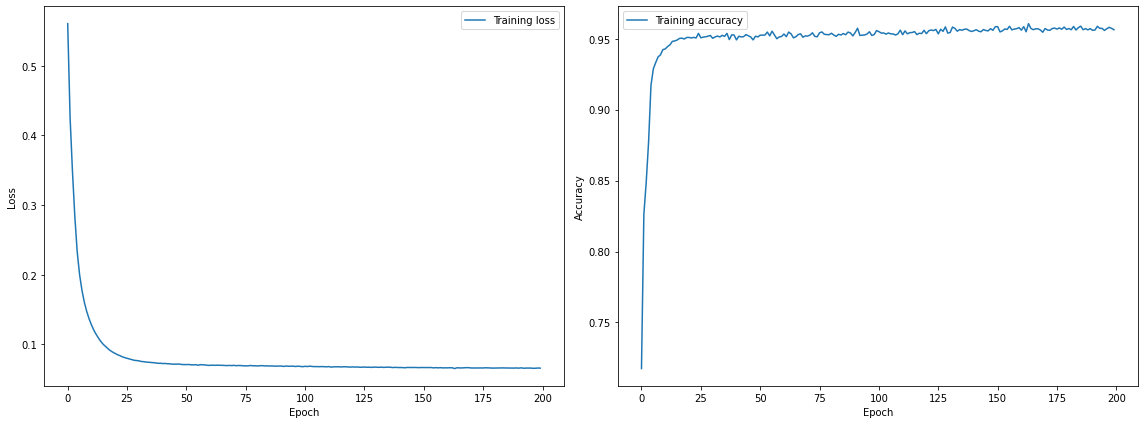

In [25]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(history.history['loss'], label='Training loss')
#ax[0].plot(history.history['val_loss'], label='Validation loss')

ax[0].legend()
ax[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)

ax[1].plot(history.history['binary_accuracy'], label='Training accuracy')
#ax[1].plot(history.history['val_acc'], label='Validation accuracy')

ax[1].set(
    ylabel='Accuracy',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

## Verificando os valores previstos com os valores esperados

In [27]:
y_pred = mlp.predict(x_test)

c = 0
e = 0

y_test = y_test.to_numpy()

print(type(y_pred))

print(type(y_test))

for i in range(len(x_test)):
  if(np.array_equal(np.round(y_pred[i]).astype(int),y_test[i])):
    print(np.round(y_pred[i]).astype(int),"---------", y_test[i],'V')
    c+=1
  else:
    print(np.round(y_pred[i]).astype(int),"---------", y_test[i],'F')
    e+=1

print("C:", c)
print("E:", e)

19/19 [==============================] - 0s 2ms/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0 0 1 0] --------- [0 0 1 0] V
[0 0 1 0] --------- [0 0 1 0] V
[1 0 0 0] --------- [1 0 0 0] V
[1 0 0 1] --------- [0 0 1 1] F
[0 0 0 0] --------- [0 0 0 0] V
[0 1 0 1] --------- [0 1 0 1] V
[0 0 1 1] --------- [1 0 0 1] F
[0 0 1 0] --------- [0 0 1 0] V
[0 0 0 0] --------- [0 0 0 0] V
[0 1 0 0] --------- [0 1 0 0] V
[0 0 1 0] --------- [0 0 1 0] V
[0 0 1 1] --------- [0 0 1 1] V
[0 1 1 1] --------- [0 1 1 1] V
[0 1 1 0] --------- [0 1 1 0] V
[0 1 0 0] --------- [0 1 0 0] V
[1 0 0 0] --------- [1 0 0 0] V
[0 1 0 1] --------- [0 1 0 1] V
[1 0 0 1] --------- [0 0 1 1] F
[0 0 1 0] --------- [0 0 1 0] V
[0 1 1 0] --------- [0 1 1 0] V
[0 0 1 0] --------- [0 0 1 0] V
[0 1 1 0] --------- [0 1 1 0] V
[0 1 0 0] --------- [0 1 0 0] V
[0 1 0 1] --------- [0 1 0 1] V
[1 0 0 0] --------- [1 0 0 0] V
[0 0 1 1] --------- [0 0 1 1] V
[0 1 1 1] --------- [0 1 1 1] V
[0 0 1 1] --------- [0 0 1 1] V
[0 

## Imprimir pesos e bias das camadas da rede

In [29]:
for layer in mlp.layers:
    print(layer.trainable_weights)

[<tf.Variable 'dense_6/kernel:0' shape=(7, 7) dtype=float32, numpy=
array([[ 1.3240143 , -0.31840697,  0.26432708, -0.170552  , -1.8922148 ,
        -0.05899968,  0.6900924 ],
       [ 1.4508674 ,  0.27826726, -0.88343847, -0.48425615,  0.11258629,
         1.6229113 , -0.4745939 ],
       [-0.08102717, -0.16564067,  2.2056117 , -2.3668678 ,  0.0477605 ,
        -0.19420068, -1.5554687 ],
       [ 0.47059074, -0.3951145 ,  0.96479934,  0.34289148, -0.23088478,
         0.34827963, -0.33023626],
       [-0.5163081 ,  0.04077391, -0.1316837 ,  0.20626786,  0.3941909 ,
         0.31833133, -0.31305537],
       [-0.5483078 ,  2.0082116 , -0.19061667, -0.042167  ,  0.09923938,
        -0.25113505,  0.20841913],
       [ 3.071722  , -0.30073652, -0.2745872 ,  0.70215344, -0.02932997,
        -0.6105205 , -0.44473654]], dtype=float32)>, <tf.Variable 'dense_6/bias:0' shape=(7,) dtype=float32, numpy=
array([-1.8424183 , -0.29318032, -0.71793896,  0.58648545,  1.1684448 ,
       -0.06663869, -0.